In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('/content/house_train.csv', usecols =['GarageQual', 'FireplaceQu', 'SalePrice'])

In [6]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [7]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [9]:
X = df
y = df['SalePrice']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

In [11]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [13]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
254,NaN,TA,145000,TA,NaN
1066,TA,TA,178000,TA,TA
638,NaN,NaN,85000,NaN,NaN
799,TA,TA,175000,TA,TA
380,Gd,TA,127000,TA,Gd


In [14]:
# now we will fill the missing values with random values

X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values


X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

<ipython-input-14-6fbdb936e754>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipython-input-14-6fbdb936e754>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
<ipython-input-14-6fbdb936e754>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [16]:
# here we will see the change is frequency of each category before imputation and after imputation

temp = pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train)
    ],
    axis =1)

temp.columns = ['original', 'imputed']

In [17]:
temp

,original,imputed
TA,0.951087,0.951199
Fa,0.032609,0.032534
Gd,0.011775,0.011986
Ex,0.002717,0.002568
Po,0.001812,0.001712


In [19]:

temp = pd.concat(
    [
        X_train['FireplaceQu'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
    ],
    axis =1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.276268,0.492295
TA,0.228261,0.403253
Fa,0.024457,0.044521
Ex,0.019022,0.034247
Po,0.014493,0.025685


**we can see here that since the missing data was very large, the differnce is frequency is also very large which is a RED FLAG**

In [21]:
import seaborn as sns

<ipython-input-22-7bdcb7408e42>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist =False, label = category)
<ipython-input-22-7bdcb7408e42>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQ

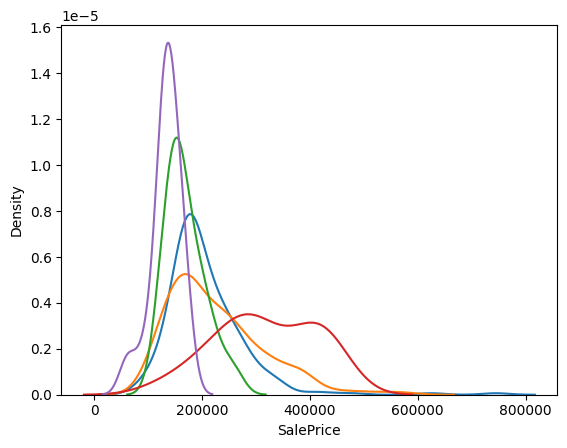

In [22]:
for category in X_train['FireplaceQu'].dropna().unique():
  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist =False, label = category)

plt.show()

<ipython-input-23-24aeabad0730>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], hist =False, label = category)
<ipython-input-23-24aeabad0730>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Fi

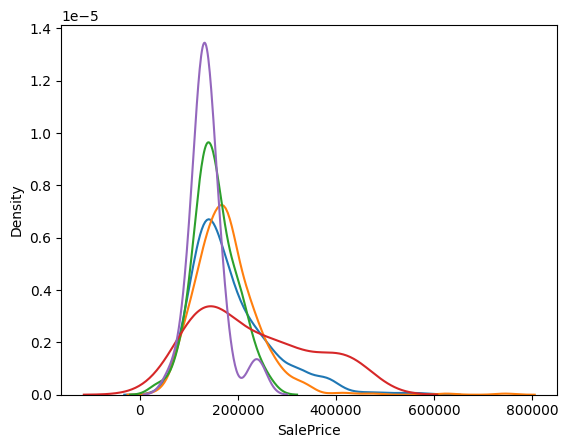

In [23]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], hist =False, label = category)

plt.show()